In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np

In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = img / 255.0
    return img, label

def make_dataset(df):
    ds = tf.data.Dataset.from_tensor_slices((df["path"], df["label"]))
    ds = ds.map(load_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds


In [4]:
model = models.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.Conv2D(16, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 global_average_pooling2d (  (None, 64)                0

In [ ]:
train_ds = make_dataset(train_df)
val_ds = make_dataset(val_df)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

In [6]:
train_df = pd.read_csv("../data/processed/splits/train.csv")
val_df = pd.read_csv("../data/processed/splits/val.csv")

In [7]:
train_ds = make_dataset(train_df)
val_ds = make_dataset(val_df)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1
)

Epoch 1/10
2000/2000 [==============================] - 1592s 794ms/step - loss: 0.1505 - accuracy: 0.9332 - val_loss: 0.0584 - val_accuracy: 0.9839
Epoch 2/10
2000/2000 [==============================] - 1397s 698ms/step - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.0657 - val_accuracy: 0.9801
Epoch 3/10
 679/2000 [=========>....................] - ETA: 14:34 - loss: 0.0474 - accuracy: 0.9862

KeyboardInterrupt: 

In [8]:
# Evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


500/500 [==============================] - 118s 235ms/step - loss: 0.0450 - accuracy: 0.9862
Validation Loss: 0.0450
Validation Accuracy: 0.9862


In [13]:
val_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [14]:
for images, labels in val_ds.take(1):
    print("Image batch shape:", images)
    print("Label batch shape:", labels)

Image batch shape: tf.Tensor(
[[[[0.6901435  0.67445725 0.63132   ]
   [0.6781431  0.6624568  0.61931956]
   [0.662535   0.64684874 0.6037115 ]
   ...
   [0.7416485  0.7259622  0.6789034 ]
   [0.7142503  0.69856405 0.65150523]
   [0.68645865 0.6707724  0.62371355]]

  [[0.69411814 0.67843187 0.6352946 ]
   [0.68227416 0.6665879  0.6234506 ]
   [0.6704832  0.6547969  0.61165965]
   ...
   [0.733491   0.71780473 0.6707459 ]
   [0.7101176  0.6944313  0.6473725 ]
   [0.6864314  0.67074513 0.6236863 ]]

  [[0.698118   0.6824317  0.63929445]
   [0.69009364 0.67440736 0.6312701 ]
   [0.6784314  0.6627451  0.61960787]
   ...
   [0.72156435 0.7058781  0.65881926]
   [0.7022183  0.686532   0.6394732 ]
   [0.6865094  0.6708231  0.6237643 ]]

  ...

  [[0.64355665 0.63179195 0.59649783]
   [0.64747643 0.6357117  0.6004176 ]
   [0.65541404 0.64364934 0.6083552 ]
   ...
   [0.66326606 0.6358151  0.60417986]
   [0.66685057 0.6393996  0.6077643 ]
   [0.67095506 0.6435041  0.6118688 ]]

  [[0.6470063  

1/1 [==============================] - 1s 790ms/step


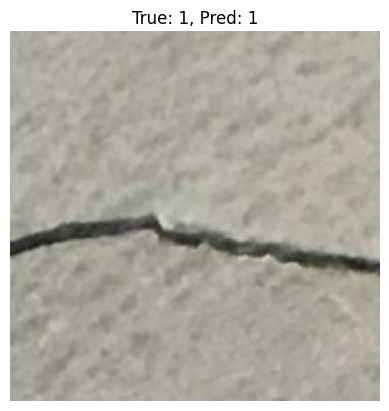

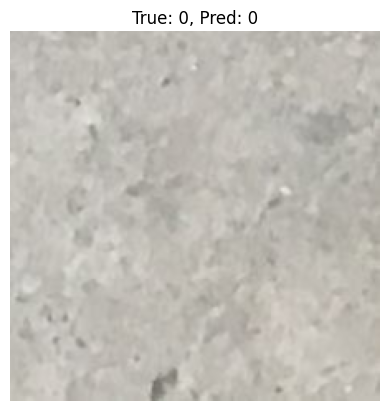

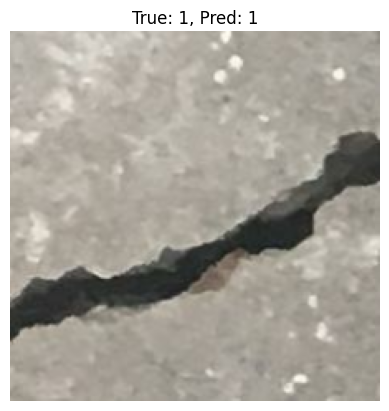

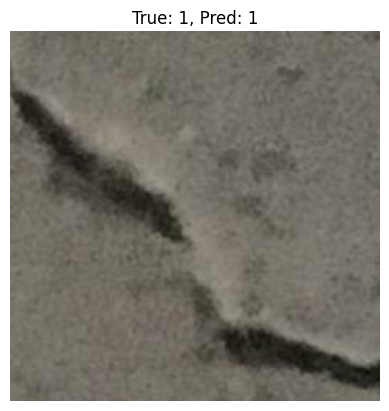

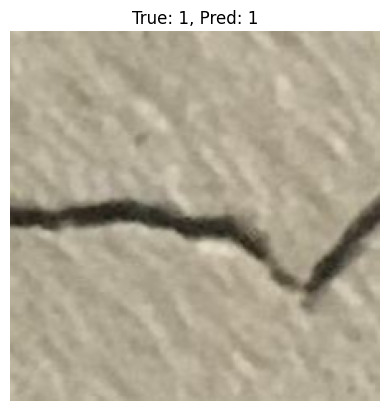

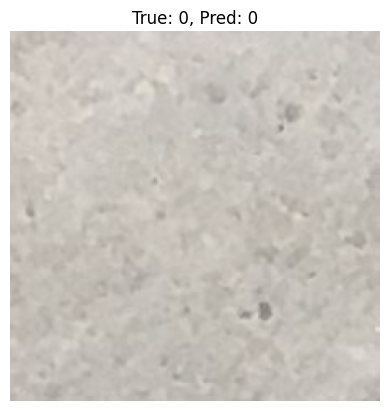

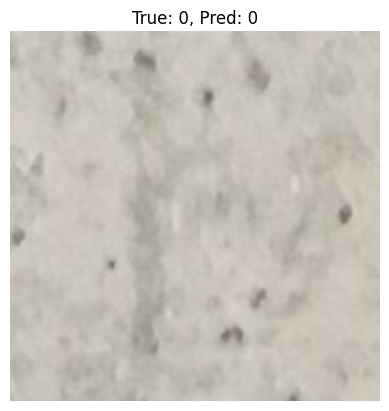

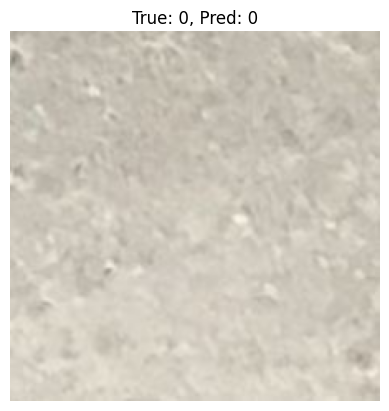

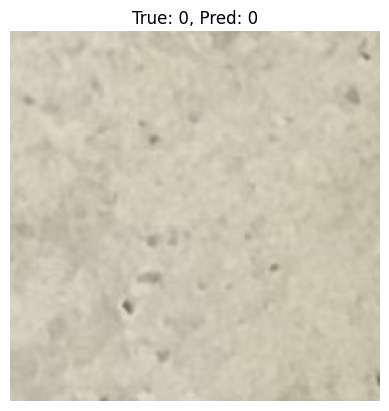

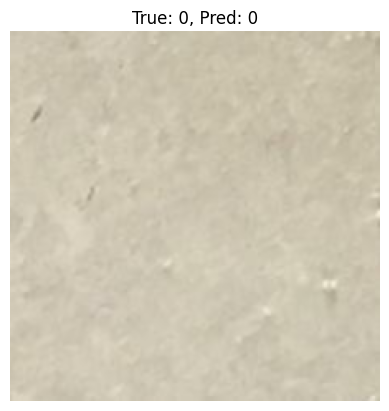

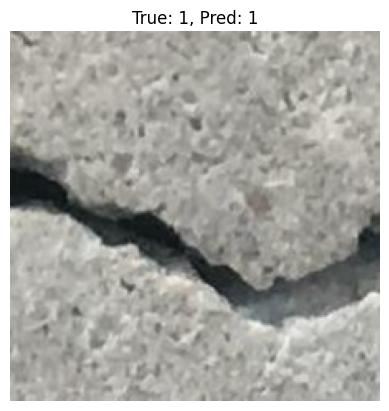

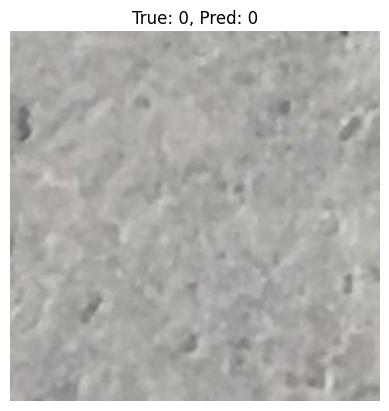

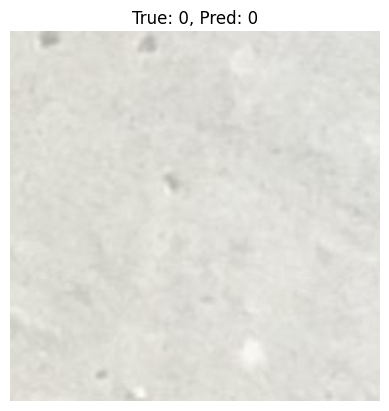

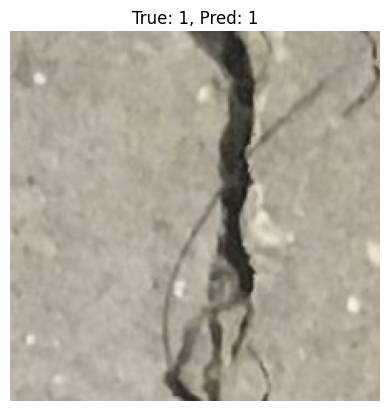

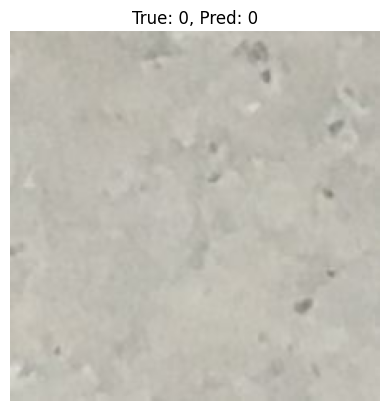

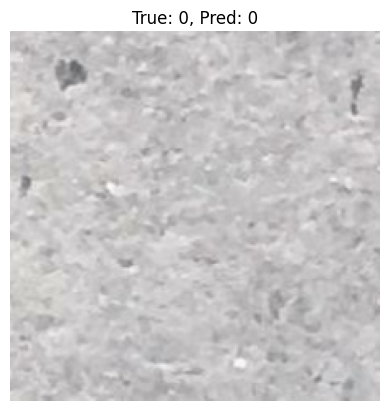

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Take one batch from validation dataset
for images, labels in val_ds.take(1):  # takes one batch
    preds = model.predict(images)       # predict probabilities
    preds_label = (preds > 0.5).astype(int)  # convert to 0/1

    # Loop over images in the batch
    for i in range(len(images)):
        plt.imshow(images[i].numpy())
        plt.title(f"True: {labels[i].numpy()}, Pred: {preds_label[i][0]}")
        plt.axis("off")
        plt.show()

In [16]:
model.save("../saved_models/crack_classifier")


INFO:tensorflow:Assets written to: ../saved_models/crack_classifier\assets


INFO:tensorflow:Assets written to: ../saved_models/crack_classifier\assets


In [ ]:
1+1

: 